In [ ]:
pip install keras

In [ ]:
pip install numpy 

In [ ]:
pip install tensorflow

In [1]:
# Importing the Keras libraries and packages

from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2


train_dir = r"C:\Users\Abhijeeth\Desktop\ML\data_split\train"
eval_dir = r"C:\Users\Abhijeeth\Desktop\ML\data"

In [2]:
#Helper function to load images from given directories
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [3]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
#No of train images in trian folder
print("Number of training images: " , train_n)
#No of test images in trian folder
print("Number of testing images: ", test_n)
#Total images used from image processing images.
eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  35
Number of training images:  11200
Number of testing images:  2800
Number of evaluation images:  21000


In [5]:
uniq_labels

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [7]:
print(y_train[0])
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
35


In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [9]:
#Initialising ResNet50 
classifier_resnet = ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [10]:
#don't train existing weights for resnet50
for layer in classifier_resnet.layers:
    layer.trainable = False

In [11]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=35, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

In [13]:
#fit the model
#it will take some time to train
history2 = model2.fit(X_train, y_train, epochs =20, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 65s 337ms/step - accuracy: 0.2118 - loss: 3.1025 - val_accuracy: 0.8732 - val_loss: 1.6657
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 213ms/step - accuracy: 0.6323 - loss: 1.6798 - val_accuracy: 0.9764 - val_loss: 1.1381
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 212ms/step - accuracy: 0.7447 - loss: 1.2618 - val_accuracy: 0.9989 - val_loss: 0.8263
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 211ms/step - accuracy: 0.7958 - loss: 1.0259 - val_accuracy: 0.9968 - val_loss: 0.6375
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.8329 - loss: 0.8627 - val_accuracy: 0.9979 - val_loss: 0.4969
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 215ms/step - accuracy: 0.8541 - loss: 0.7485 - val_accuracy: 0.9989 - val_loss: 0.4017
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 212ms/step - accuracy: 0.8780 - loss: 0.6621 - val_accuracy: 0.9968 - val_loss: 0.3307
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 213ms/step - accuracy: 0.8842 - loss: 0

In [14]:
# Saving the model of resnet
model2.save('model_resnet.h5')

In [15]:
y_pred_prob = model2.predict(X_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step


In [16]:
# Access the accuracy values from history
train_accuracy_last_epoch = history2.history['accuracy'][-1]
val_accuracy_last_epoch = history2.history['val_accuracy'][-1]

In [17]:
print(f'Training Accuracy (last epoch): {train_accuracy_last_epoch * 100:.2f}%')
print(f'Validation Accuracy (last epoch): {val_accuracy_last_epoch * 100:.2f}%')

Training Accuracy (last epoch): 93.41%
Validation Accuracy (last epoch): 99.86%


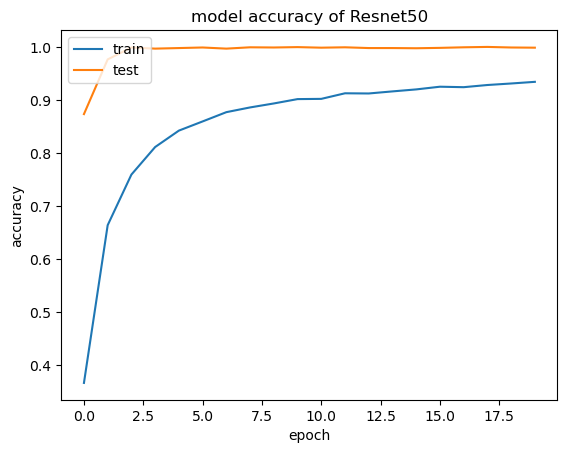

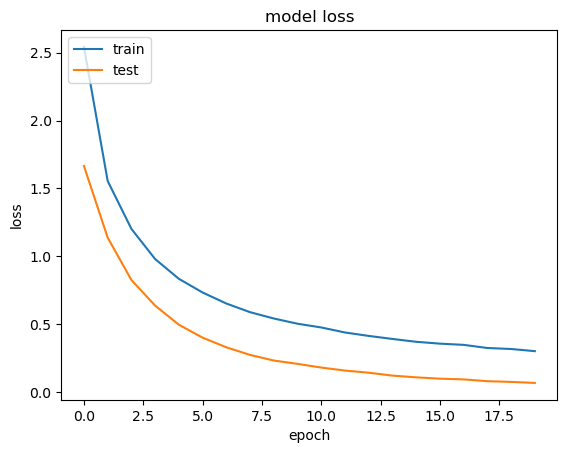

In [18]:
#Resnet50
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy of Resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: R


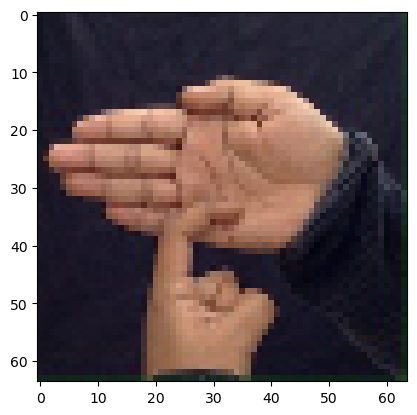

In [19]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
test_image = image.load_img(r"C:\Users\Abhijeeth\Desktop\ML\data_split\test\R\74.jpg", target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image if the model was trained with normalized data

# Predict the class of the image
result = model2.predict(test_image)

# Define the class labels
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Get the index of the predicted class
predicted_index = np.argmax(result)

# Get the predicted class label
prediction = classes[predicted_index]

print("Predicted class:", prediction)
